In [1]:
#Data Science Assignment : Using Formula

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns

In [3]:
# Import Iris Dataset from sklearn 
from sklearn.datasets import load_iris
get_ipython().run_line_magic('matplotlib', 'inline')


In [4]:
iris=load_iris()

In [5]:
#creating dataframe
df=pd.DataFrame(data=iris.data,columns=iris.feature_names)

In [6]:
dff=pd.DataFrame(data=iris.target,columns=['species'])

In [7]:
def converter(specie):
    if specie==0:
        return 'setosa'
    elif specie==1:
        return 'versicolor'
    else:
        return 'virginica'
dff['species']=dff['species'].apply(converter)
df=pd.concat([df,dff],axis=1)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
species              150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


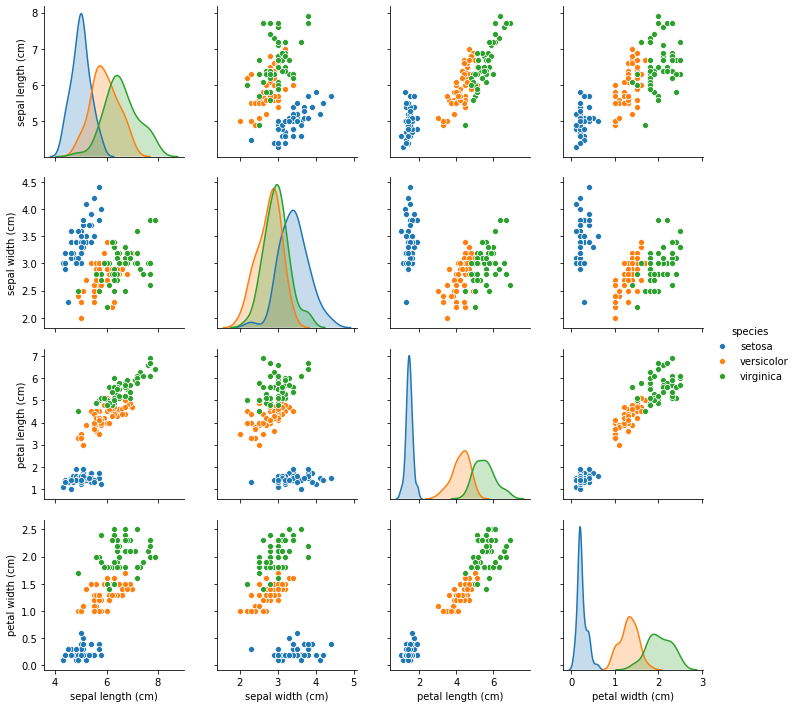

In [9]:
sns.pairplot(df, hue= 'species')

In [10]:
#for calculating the error of the model,we'll predict sepal length 
#then compare it with the actual sepal length given in our dataset

#linear reg object
reg=linear_model.LinearRegression()
#species->number dtype
df.drop('species',axis=1,inplace=True)
dff=pd.DataFrame(columns=['species'],data=iris.target)
df=pd.concat([df,dff],axis=1)
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [11]:
y=df['sepal length (cm)']
z=df['sepal width (cm)']
x=df.drop(axis=1,labels=['sepal length (cm)', 'sepal width (cm)'])
x

,petal length (cm),petal width (cm),species
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
5,1.7,0.4,0
6,1.4,0.3,0
7,1.5,0.2,0
8,1.4,0.2,0
9,1.5,0.1,0


In [12]:
#training the model
x_train, x_test, y_train, y_test = train_test_split(y,z, test_size=0.2,random_state=101)


Text(0, 0.5, 'Sepal width (cm)')

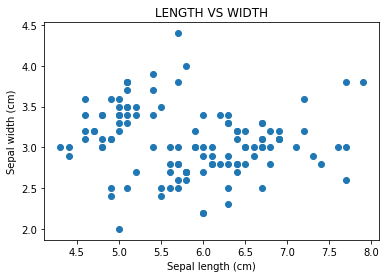

In [13]:
plt.scatter(x_train,y_train)
plt.title("LENGTH VS WIDTH")
plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")


In [14]:
x=x_train
y=y_train
mean_x=x.mean()
mean_y=y.mean()
#calculating B1 and B0
b1=np.divide(np.sum(np.multiply(np.subtract(x,mean_x),np.subtract(y,mean_y))),np.sum(np.square(np.subtract(x,mean_x))))
print("B1: ",b1)
b0=np.subtract(mean_y,np.multiply(b1,mean_x))
print("B0: ",b0)

B1:  -0.05834498788583135
B0:  3.418471054031162


In [15]:
#Y=b0+b1*X
prediction=b0+b1*x_test
prediction
#prediction will be compared to y_test for error


33     3.097574
16     3.103408
43     3.126746
129    2.998387
50     3.010056
123    3.050898
68     3.056732
53     3.097574
146    3.050898
1      3.132581
147    3.039229
32     3.115077
31     3.103408
122    2.969215
127    3.062567
74     3.045063
88     3.091739
96     3.085905
42     3.161753
134    3.062567
80     3.097574
48     3.109243
90     3.097574
65     3.027560
97     3.056732
64     3.091739
93     3.126746
114    3.080070
25     3.126746
41     3.155919
Name: sepal length (cm), dtype: float64

In [16]:
rmse=np.sqrt(np.divide(np.sum(np.square(np.subtract(prediction,y_test))),x.size))


In [17]:
print("Root mean squared error is for sepal length vs sepal width is: ",rmse)


Root mean squared error is for sepal length vs sepal width is:  0.2561177665293032


In [18]:
#non linear curves

prediction=b0+b1*np.square(x_test)


In [19]:
rmse=np.sqrt(np.divide(np.sum(np.square(np.subtract(prediction,y_test))),x.size))



In [20]:
print("Root mean squared error is for sepal length vs sepal width is using non linear curve: ",rmse)



Root mean squared error is for sepal length vs sepal width is using non linear curve:  0.8454376369521435
